##**10. Estrategia de Modelado y Evaluación**:

Para abordar este problema de aprendizaje no supervisado, se implementará una estrategia comparativa que evaluará el rendimiento de seis algoritmos de clustering fundamentales:

- **K-Means**: Algoritmo de particionamiento que divide los datos en k grupos, minimizando la variabilidad dentro de cada cluster. Es eficiente y adecuado para clusters de forma esférica y tamaño similar.

- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Algoritmo basado en densidad que identifica clusters de forma arbitraria y detecta automáticamente los puntos atípicos (ruido).

- **Mean-Shift**: Algoritmo también basado en densidad que busca modos o picos en la distribución de los datos. No requiere especificar el número de clusters, pero no es escalable en grandes volúmenes de datos.

- **Agglomerative Clustering (Clustering Jerárquico Aglomerativo)**: Construye una jerarquía de clusters fusionando los más cercanos en cada paso. Permite explorar estructuras jerárquicas y utilizar diferentes métricas de distancia.

- **HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)**: Variante jerárquica de DBSCAN que permite detectar clusters de densidades variables y formas no esféricas. Es robusto ante ruido, no requiere especificar el número de clusters y genera una jerarquía para extraer la mejor partición basada en estabilidad.

- **Spectral Clustering**: Algoritmo que emplea la descomposición espectral de un grafo de similitudes para identificar estructuras complejas en los datos. Resulta eficaz cuando los clusters no tienen forma esférica y requieren capturar relaciones no lineales entre los puntos.

Para cada uno de estos modelos se explorará el impacto de distintas estrategias de preprocesamiento sobre la calidad del agrupamiento.

**Fases de experimentación:**
1. **Entrenamiento sin preprocesamiento**.
  Se aplicarán todos los algoritmos excepto Mean-Shift, ya que éste requiere de datos normalizados, directamente sobre los datos originales, sin tratar outliers, sesgos ni normalizar. Esto establecerá una línea base para evaluar la sensibilidad de cada modelo frente a la escala y distribución original.

        Conjunto de datos:
          train_data_sin_procesar

2. **Entrenamiento con normalización.**
  Se escalarán los datos con StandardScaler antes de aplicar los algoritmos. Esta etapa evaluará si un escalado uniforme mejora los resultados de los modelos sensibles a las distancias.

        Conjunto de datos:
          train_data_sin_procesar

3. **Entrenamiento con tratamiento de outliers, sesgo y normalización.**
  Se aplicará el pipeline de preprocesamiento completo (detección y tratamiento de valores extremos, corrección del sesgo, normalización). Esto permitirá probar si una distribución más simétrica y a escala mejora significativamente la calidad del clustering.

        Conjunto de datos:
          train_df_scaled

**Métricas de Evaluación**:

Se utilizarán múltiples métricas para evaluar el rendimiento de los algoritmos:

- **Silhouette Coefficient**: Evalúa la cohesión interna de los clusters frente a su separación. Valores próximos a 1 indican agrupamientos bien definidos.

- **Davies-Bouldin Index**: Mide la similitud entre cada cluster y el más cercano. Cuanto menor, mejor separados y más compactos son los clusters.

- **Índice de Calinski-Harabasz**: Evalúa la proporción entre la dispersión inter-cluster e intra-cluster. Valores altos indican una buena estructura de agrupamiento.

**Ajuste de Hiperparámetros y Evaluación Final**
Tras identificar los modelos y estrategias de preprocesamiento más prometedores, se ajustarán los hiperparámetros mediante búsqueda aleatoria (por ejemplo, k en K-Means o eps y min_samples en DBSCAN).

El modelo final seleccionado se ajustará con todo el conjunto de datos.

Este enfoque exhaustivo permitirá identificar no solo el algoritmo más adecuado para los datos químicos de los vinos, sino también la mejor combinación de preprocesamiento e hiperparámetros para maximizar la calidad del agrupamiento.

###**10.1. Descarga de datos:**

In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Descarga de los archivos de datos sin procesar
nombre_archivo_train_sin_procesar = 'train_data_sin_procesar.pkl'

# Descargar el archivo de datos de entrenamiento
with open(nombre_archivo_train_sin_procesar, 'rb') as archivo:
    train_data_sin_procesar = pickle.load(archivo)

In [4]:
train_data_sin_procesar.shape

(173, 13)

In [5]:
# Hago 2 copias de los dataframe, para las dos primeras pruebas de modeloado.
train_data_sin_procesar_1 = train_data_sin_procesar.copy()
train_data_sin_procesar_2 = train_data_sin_procesar.copy()

In [6]:
train_data_sin_procesar_1.shape

(173, 13)

In [7]:
train_data_sin_procesar_2.shape

(173, 13)

In [8]:
# Descarga de los archivos de datos procesados (tratamiento de outliers y sesgo y normalización)
nombre_archivo_train_procesado = 'train_df_scaled.pkl'

# Descargar el archivo de datos de entrenamiento
with open(nombre_archivo_train_procesado, 'rb') as archivo:
    train_df_scaled = pickle.load(archivo)

In [9]:
train_df_scaled.shape

(157, 10)

###**10.2. Entrenamiento de modelos:**

In [10]:
# Importar diferentes modelos de clustering
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering, SpectralClustering
from hdbscan import HDBSCAN

# Importar métricas
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

####**10.2.1. Entrenamiento de modelos sin preprocesamiento:**

In [11]:
# K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(train_data_sin_procesar_1)

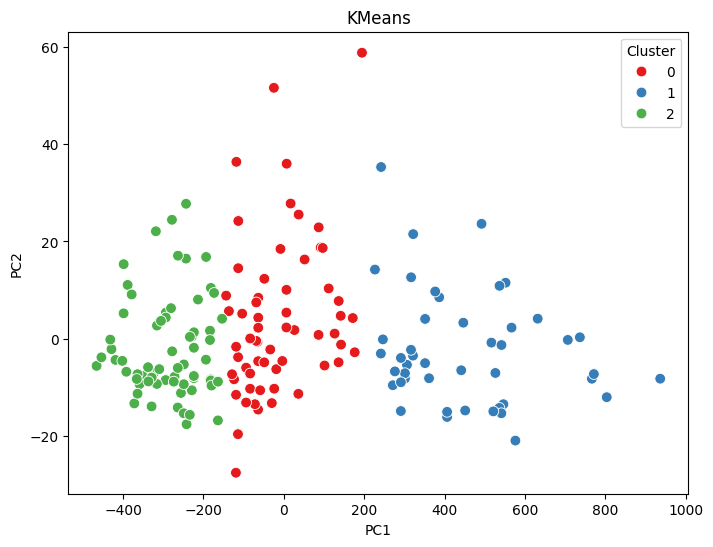

In [12]:
# Realizar PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_data_sin_procesar_1)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_clusters, palette="Set1", s=60)
plt.title("KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [13]:
## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_data_sin_procesar_1, kmeans_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_data_sin_procesar_1, kmeans_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_data_sin_procesar_1, kmeans_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

Silhouette Score: 0.573
Davies-Bouldin Score: 0.531
Calinski-Harabasz Score: 542.650


In [14]:
# DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan_clusters = dbscan.fit_predict(train_data_sin_procesar_1)

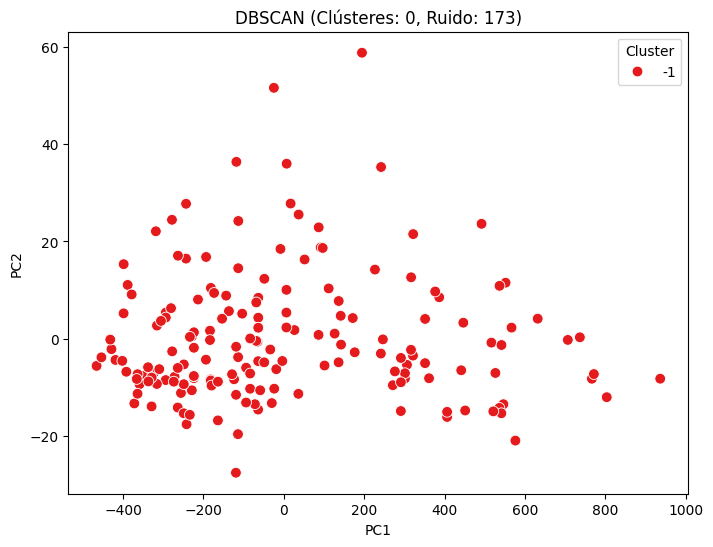

In [15]:
# Graficar la solución
plt.figure(figsize=(8,6))
# Los puntos clasificados como ruido por DBSCAN tienen la etiqueta -1.
# Para la visualización, a menudo se les da un color distinto o se excluyen.
unique_labels = np.unique(dbscan_clusters)
n_clusters_ = len(unique_labels) - (1 if -1 in dbscan_clusters else 0)

# Crea una paleta de colores. Si hay ruido (-1), se le asigna el último color.
palette = sns.color_palette("Set1", n_colors=len(unique_labels))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=dbscan_clusters, palette=palette, s=60)
plt.title(f"DBSCAN (Clústeres: {n_clusters_}, Ruido: {np.sum(dbscan_clusters == -1)})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [16]:
## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_data_sin_procesar_1, dbscan_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_data_sin_procesar_1, dbscan_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_data_sin_procesar_1, dbscan_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [17]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg.fit_predict(train_data_sin_procesar_1)

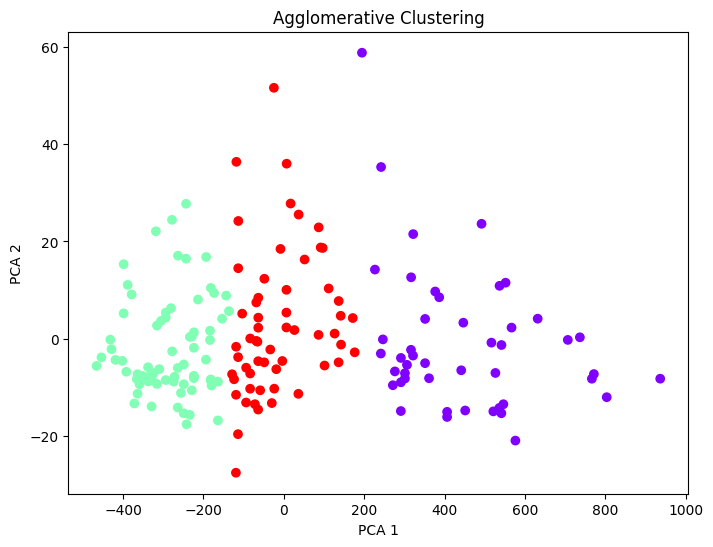

In [18]:
# Graficar la solución
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=agg_clusters, cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [19]:
# Silhouette Score
silhouette_avg = silhouette_score(train_data_sin_procesar_1, agg_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(train_data_sin_procesar_1, agg_clusters)
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(train_data_sin_procesar_1, agg_clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.3f}")

Silhouette Score: 0.567
Davies-Bouldin Index: 0.531
Calinski-Harabasz Index: 534.079


In [20]:
# HDBSCAN
!pip install hdbscan
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=5, min_samples=5, prediction_data=True)
hdbscan_clusters = hdbscan_model.fit_predict(train_data_sin_procesar_1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


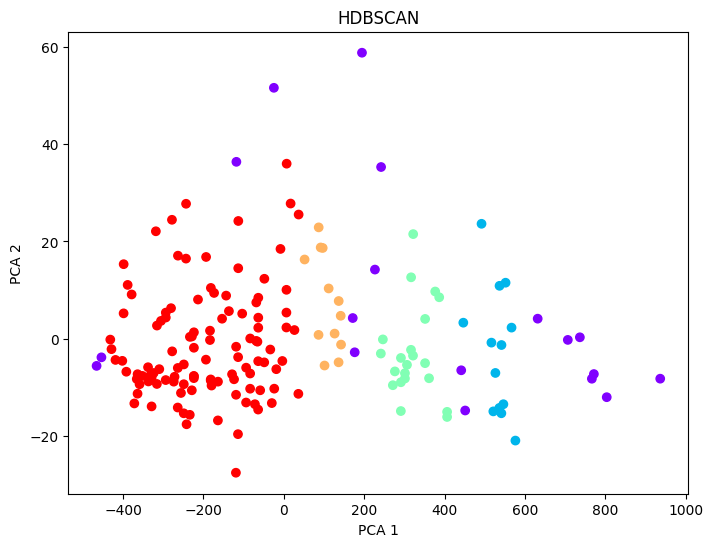

In [21]:
# Graficar la solución
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=hdbscan_clusters, cmap='rainbow')
plt.title("HDBSCAN")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [22]:
# Silhouette Score
silhouette_avg = silhouette_score(train_data_sin_procesar_1, hdbscan_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(train_data_sin_procesar_1, hdbscan_clusters)
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(train_data_sin_procesar_1, hdbscan_clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.3f}")

Silhouette Score: 0.380
Davies-Bouldin Index: 6.987
Calinski-Harabasz Index: 104.595


In [23]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
spectral_clusters = spectral.fit_predict(train_data_sin_procesar_1)

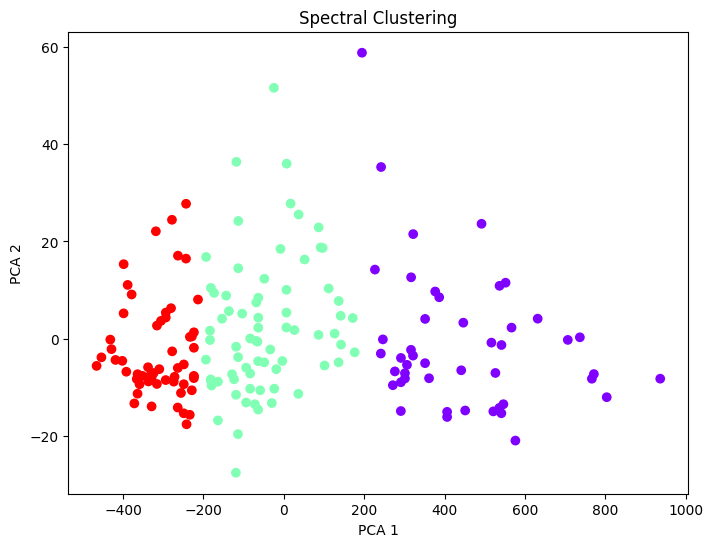

In [24]:
# Graficar la solución
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=spectral_clusters, cmap='rainbow')
plt.title("Spectral Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [25]:
# Silhouette Score
silhouette_avg = silhouette_score(train_data_sin_procesar_1, spectral_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(train_data_sin_procesar_1, spectral_clusters)
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(train_data_sin_procesar_1, spectral_clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.3f}")

Silhouette Score: 0.558
Davies-Bouldin Index: 0.525
Calinski-Harabasz Index: 515.956


####**10.2.2. Entrenamiento de modelos sin preprocesamiento y con Normalización (Escalado):**

In [39]:
# Escalar el conjunto de datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data_sin_procesar_2)
print(f"Dimensiones de train_scaled: {train_scaled.shape}")
print("Datos escalados con StandardScaler.")

Dimensiones de train_scaled: (173, 13)
Datos escalados con StandardScaler.


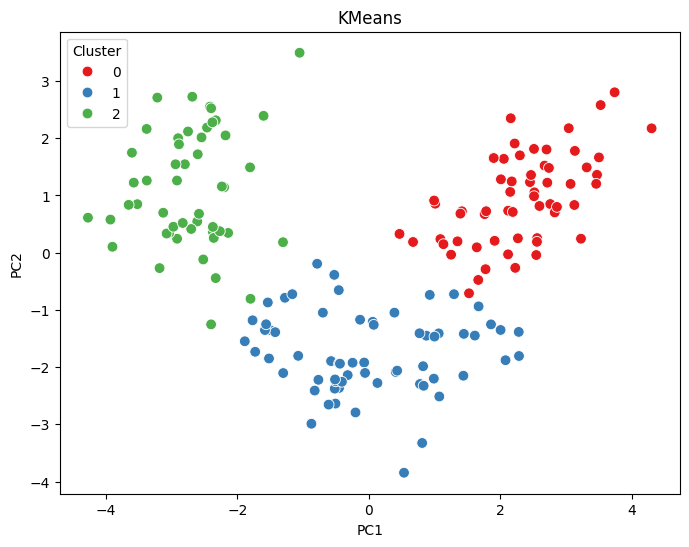

In [40]:
# K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(train_scaled)

# Realizar PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_scaled)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_clusters, palette="Set1", s=60)
plt.title("KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [41]:
## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_scaled, kmeans_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_scaled, kmeans_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_scaled, kmeans_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

Silhouette Score: 0.283
Davies-Bouldin Score: 1.395
Calinski-Harabasz Score: 68.408


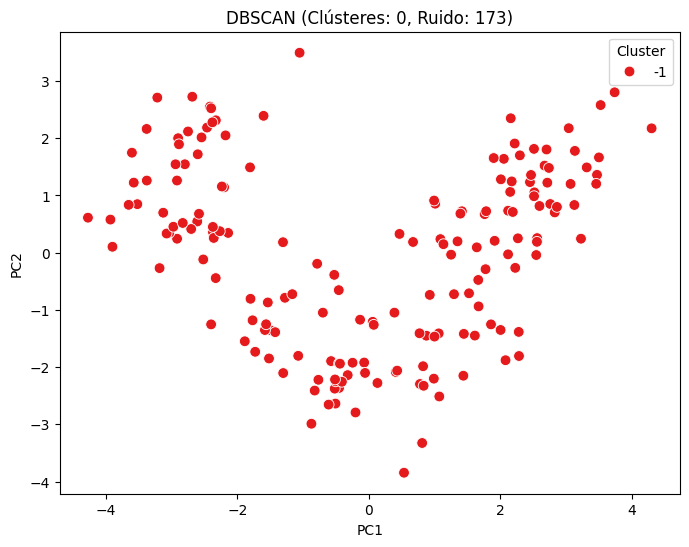

In [42]:
# DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan_clusters = dbscan.fit_predict(train_scaled)

# Graficar la solución
plt.figure(figsize=(8,6))
# Los puntos clasificados como ruido por DBSCAN tienen la etiqueta -1.
# Para la visualización, a menudo se les da un color distinto o se excluyen.
unique_labels = np.unique(dbscan_clusters)
n_clusters_ = len(unique_labels) - (1 if -1 in dbscan_clusters else 0)

# Crea una paleta de colores. Si hay ruido (-1), se le asigna el último color.
palette = sns.color_palette("Set1", n_colors=len(unique_labels))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=dbscan_clusters, palette=palette, s=60)
plt.title(f"DBSCAN (Clústeres: {n_clusters_}, Ruido: {np.sum(dbscan_clusters == -1)})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [43]:
## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_scaled, dbscan_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_scaled, dbscan_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_scaled, dbscan_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

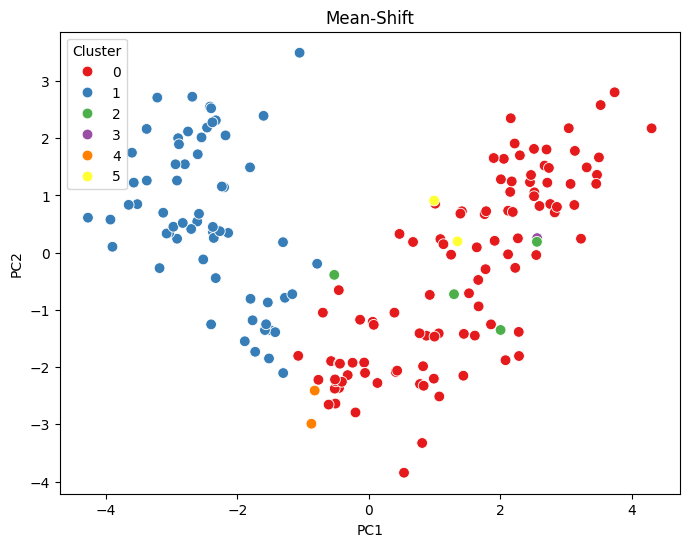

In [44]:
# Mean-Shift
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(train_scaled, quantile=0.2, n_samples=len(train_data_scaled))
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_clusters = ms.fit_predict(train_scaled)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=mean_shift_clusters, palette="Set1", s=60)
plt.title("Mean-Shift")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [45]:
## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_scaled, mean_shift_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_scaled, mean_shift_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_scaled, mean_shift_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

Silhouette Score: 0.201
Davies-Bouldin Score: 1.095
Calinski-Harabasz Score: 19.243


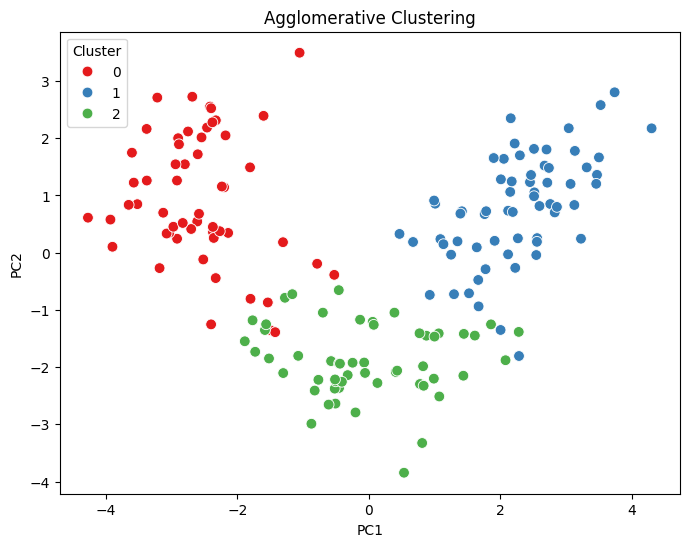

In [46]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg.fit_predict(train_scaled)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=agg_clusters, palette="Set1", s=60)
plt.title("Agglomerative Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [47]:
## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_scaled, agg_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_scaled, agg_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_scaled, agg_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

Silhouette Score: 0.273
Davies-Bouldin Score: 1.397
Calinski-Harabasz Score: 66.118


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


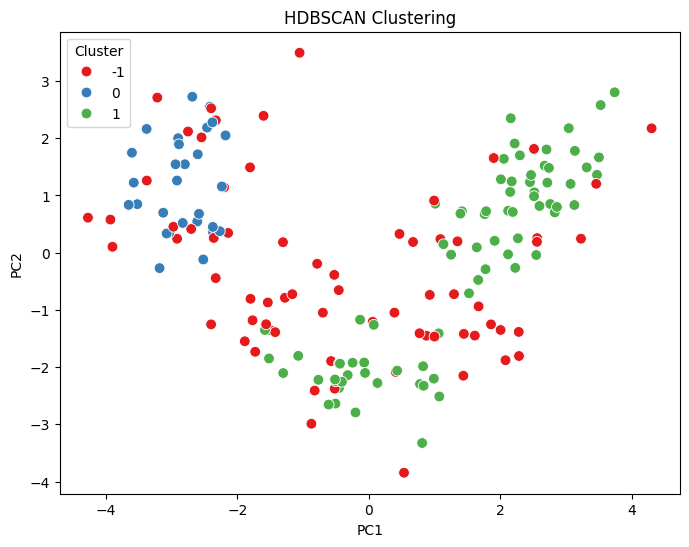

In [48]:
#HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=5, min_samples=5, prediction_data=True)
hdbscan_clusters = hdbscan_model.fit_predict(train_scaled)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=hdbscan_clusters, palette="Set1", s=60)
plt.title("HDBSCAN Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [49]:
## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_scaled, hdbscan_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_scaled, hdbscan_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_scaled, hdbscan_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

Silhouette Score: 0.101
Davies-Bouldin Score: 2.888
Calinski-Harabasz Score: 22.001


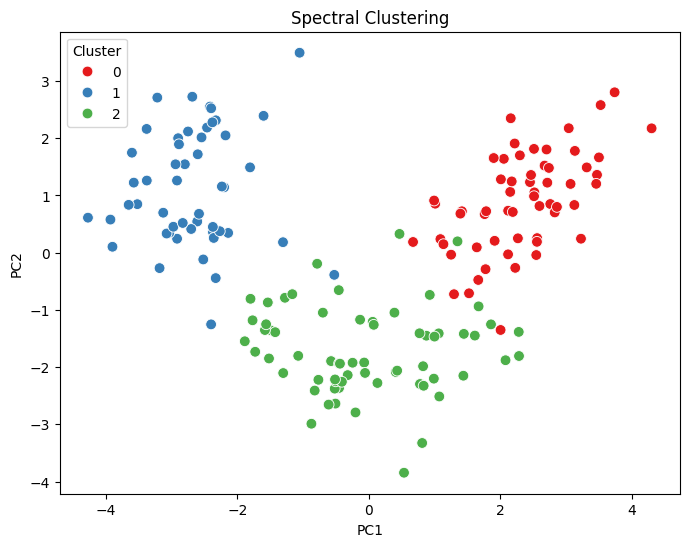

In [50]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
spectral_clusters = spectral.fit_predict(train_scaled)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=spectral_clusters, palette="Set1", s=60)
plt.title("Spectral Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [51]:
## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_scaled, spectral_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_scaled, spectral_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_scaled, spectral_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

Silhouette Score: 0.279
Davies-Bouldin Score: 1.398
Calinski-Harabasz Score: 67.501


####**10.2.3. Entrenamiento de modelos con Tratamiento de Outliers y de Sesgo y Normalización (Escalado):**

      train_df_scaled

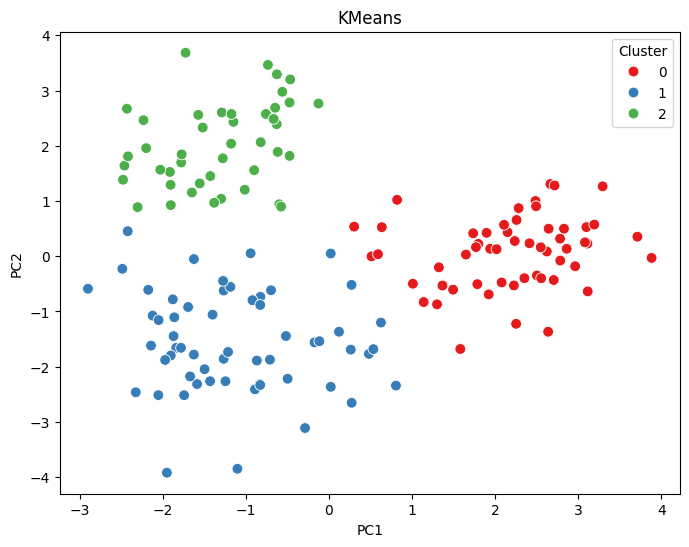

In [52]:
# K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(train_df_scaled)

# Realizar PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_df_scaled)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_clusters, palette="Set1", s=60)
plt.title("KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [53]:
## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_df_scaled, kmeans_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_df_scaled, kmeans_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_df_scaled, kmeans_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

Silhouette Score: 0.315
Davies-Bouldin Score: 1.267
Calinski-Harabasz Score: 68.130


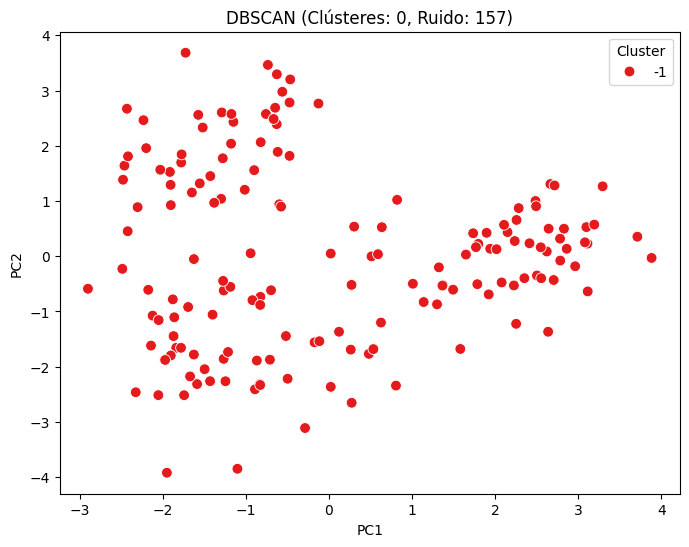

In [54]:
# DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan_clusters = dbscan.fit_predict(train_df_scaled)

# Graficar la solución
plt.figure(figsize=(8,6))
# Los puntos clasificados como ruido por DBSCAN tienen la etiqueta -1.
# Para la visualización, a menudo se les da un color distinto o se excluyen.
unique_labels = np.unique(dbscan_clusters)
n_clusters_ = len(unique_labels) - (1 if -1 in dbscan_clusters else 0)

# Crea una paleta de colores. Si hay ruido (-1), se le asigna el último color.
palette = sns.color_palette("Set1", n_colors=len(unique_labels))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=dbscan_clusters, palette=palette, s=60)
plt.title(f"DBSCAN (Clústeres: {n_clusters_}, Ruido: {np.sum(dbscan_clusters == -1)})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [55]:
## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_df_scaled, dbscan_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_df_scaled, dbscan_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_df_scaled, dbscan_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

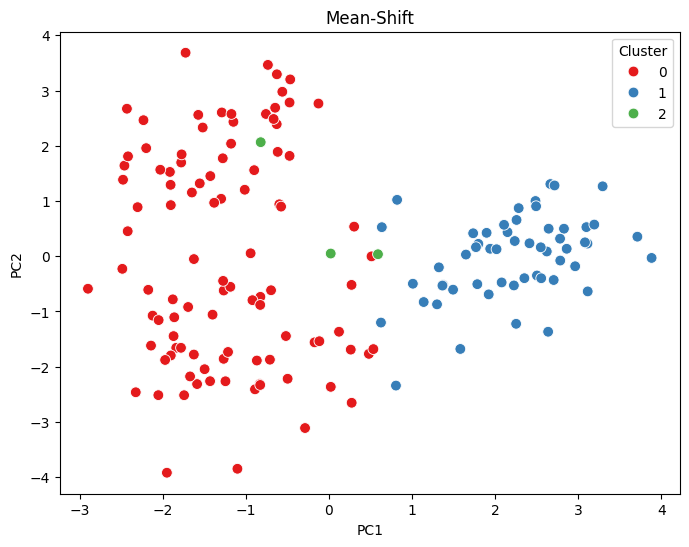

In [56]:
# Mean-Shift

bandwidth = estimate_bandwidth(train_df_scaled, quantile=0.2, n_samples=len(train_df_scaled))
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_clusters = ms.fit_predict(train_df_scaled)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=mean_shift_clusters, palette="Set1", s=60)
plt.title("Mean-Shift")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [57]:
## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_df_scaled, mean_shift_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_df_scaled, mean_shift_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_df_scaled, mean_shift_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

Silhouette Score: 0.212
Davies-Bouldin Score: 1.486
Calinski-Harabasz Score: 30.909


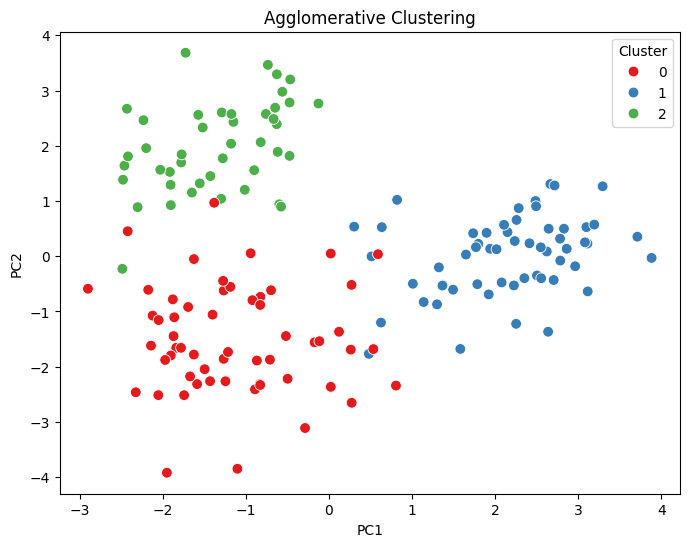

In [58]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg.fit_predict(train_df_scaled)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=agg_clusters, palette="Set1", s=60)
plt.title("Agglomerative Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [59]:
## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_df_scaled, agg_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_df_scaled, agg_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_df_scaled, agg_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

Silhouette Score: 0.308
Davies-Bouldin Score: 1.302
Calinski-Harabasz Score: 65.663


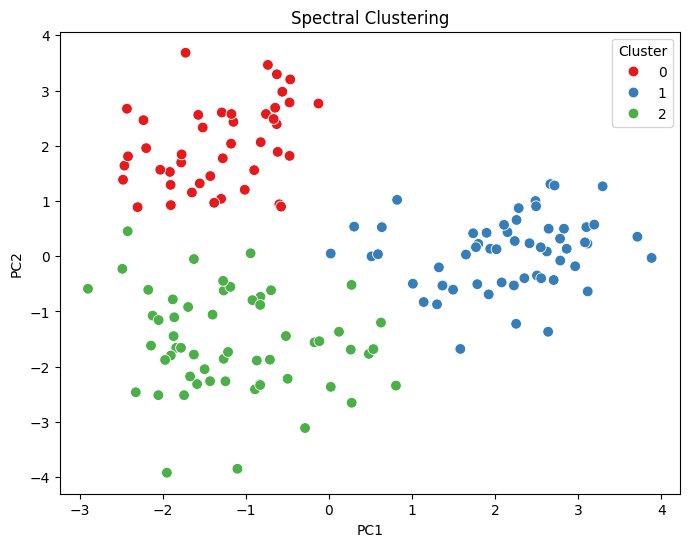

In [60]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
spectral_clusters = spectral.fit_predict(train_df_scaled)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=spectral_clusters, palette="Set1", s=60)
plt.title("Spectral Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [61]:
## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_df_scaled, spectral_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_df_scaled, spectral_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_df_scaled, spectral_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

Silhouette Score: 0.314
Davies-Bouldin Score: 1.257
Calinski-Harabasz Score: 67.755


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


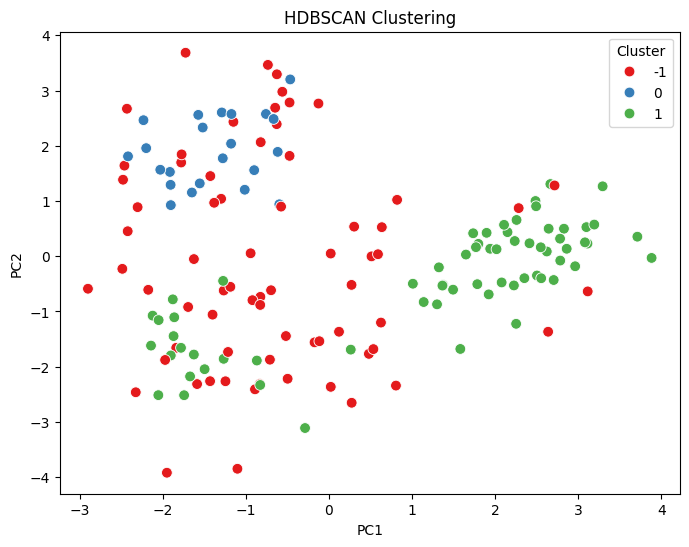

In [62]:
#HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=5, min_samples=5, prediction_data=True)
hdbscan_clusters = hdbscan_model.fit_predict(train_df_scaled)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=hdbscan_clusters, palette="Set1", s=60)
plt.title("HDBSCAN Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [63]:
## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_df_scaled, hdbscan_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_df_scaled, hdbscan_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_df_scaled, hdbscan_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

Silhouette Score: 0.092
Davies-Bouldin Score: 2.556
Calinski-Harabasz Score: 18.142


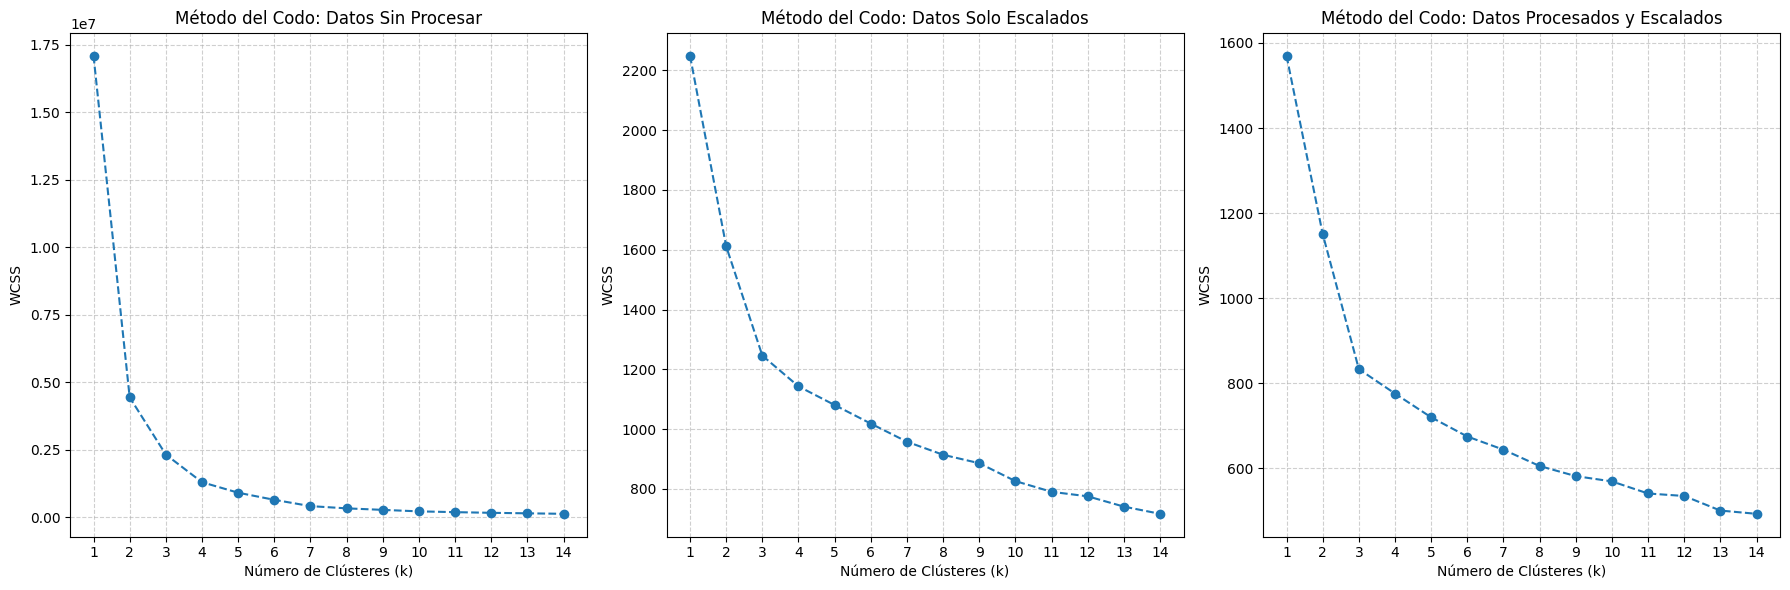

In [64]:
# Aplico el método del codo para ver una aproximación del número de clusters óptimo.
# Diccionario para almacenar los conjuntos de datos y sus etiquetas para el gráfico
datasets = {
    "Datos Sin Procesar": train_data_sin_procesar,
    "Datos Solo Escalados": train_scaled,
    "Datos Procesados y Escalados": train_df_scaled
}

# Rango de clústeres a probar
range_n_clusters = range(1, 15) # Probar de 1 a 15 clústeres

plt.figure(figsize=(18, 6)) # Un tamaño de figura más grande para los 3 gráficos

for i, (name, data) in enumerate(datasets.items()):
    wcss = []
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init=10 para robustez
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.subplot(1, 3, i + 1) # Crear un subgráfico para cada tipo de datos
    plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
    plt.title(f'Método del Codo: {name}')
    plt.xlabel('Número de Clústeres (k)')
    plt.ylabel('WCSS')
    plt.xticks(range_n_clusters)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Ajustar el diseño para evitar solapamientos
plt.show()

###**10.3. Conclusiones de la fase de entrenamiento de modelos:**

Durante la fase de entrenamiento se evaluó el rendimiento de distintos algoritmos de clustering aplicados a tres versiones del conjunto de datos: sin preprocesamiento, con escalado mediante StandardScaler y con preprocesamiento completo (tratamiento de outliers, transformación logarítmica, reducción de variables y escalado). El objetivo fue identificar estructuras de agrupación naturales y coherentes en los datos.

Se probaron seis algoritmos: K-Means, DBSCAN, Mean-Shift, Agglomerative Clustering, HDBSCAN y Spectral Clustering. Las métricas de evaluación empleadas fueron el Silhouette Score, el índice de Davies-Bouldin y el Calinski-Harabasz Score, complementadas con la interpretación visual del método del codo.

Las principales conclusiones extraídas son las siguientes:

- Los modelos entrenados con los datos sin preprocesar obtuvieron los mejores resultados globales. El algoritmo K-Means fue el más destacado, seguido de cerca por Agglomerative y Spectral Clustering, mostrando altos valores de Silhouette Score y Calinski-Harabasz, así como bajos valores de Davies-Bouldin. Estos modelos identificaron de forma clara tres grupos principales en los datos.

- El algoritmo K-Means sin preprocesamiento fue el más efectivo, con un Silhouette Score de 0,573, un índice de Davies-Bouldin de 0,531 y un Calinski-Harabasz Score de 542,65, indicando una buena separación entre los clústeres y una alta cohesión interna.

- El método del codo respaldó estos resultados, identificando un punto de inflexión claro en k = 4 solo en el dataset sin procesar. En cambio, con los datos escalados o completamente preprocesados, el gráfico del codo mostró una forma más suave, lo que sugiere que las transformaciones aplicadas pueden haber suavizado las fronteras naturales entre grupos y dificultado la detección clara del número óptimo de clústeres.

- El preprocesamiento completo redujo el rendimiento general de todos los algoritmos. Aunque mejora la calidad de los datos desde un punto de vista estadístico, también puede eliminar información valiosa para la detección de estructuras latentes. Este efecto fue particularmente evidente en la pérdida de definición de los clústeres al aplicar K-Means y Agglomerative Clustering.

- DBSCAN y Mean-Shift no ofrecieron resultados válidos, ya que no detectaron clústeres o no se ejecutaron correctamente con los parámetros por defecto. HDBSCAN, por su parte, generó resultados subóptimos con un Silhouette Score de 0,38 y un Davies-Bouldin Index elevado (6,987), lo que indica una pobre separación entre grupos.

En conclusión, el análisis demuestra que, en este caso concreto, los datos originales sin preprocesar permiten una mejor detección de estructuras de clústeres, especialmente con algoritmos como **K-Means**, **Agglomerative Clustering** y **Spectral Clustering**.

##**11. Próximos Pasos: Optimización de Clustering Basada en Métricas y Método del Codo:**

A partir del análisis de métricas internas (Silhouette, Davies-Bouldin, Calinski-Harabasz) y la interpretación del Método del Codo, los siguientes pasos estarán centrados en optimizar los algoritmos de clustering con mejor desempeño:

- **Modelos seleccionados para optimización:**
Se continuará el análisis con **K-Means**, **Agglomerative Clustering** y **Spectral Clustering**, que han demostrado métricas sólidas y coherencia en los datos escalados. Los datos sin tratar (train_data_sin_procesar) serán la base para el ajuste de parámetros.

- **Determinación y validación del número óptimo de clústeres:**
El Método del Codo sugiere una elección entre k=3 y k=4, respaldada por buenos valores de Silhouette y Calinski-Harabasz en múltiples modelos. Se explorarán las dos opciones en búsqueda de mejoras métricas o interpretativas.

- **Ajuste de hiperparámetros y evaluación en múltiples etapas:** Aunque los hiperparámetros han sido especificados inicialmente al entrenar los modelos, se procederá a su ajuste sistemático (como el affinity en Spectral) para maximizar métricas y coherencia visual:

  - K-Means y Agglomerative: se evaluarán valores de k en torno a 3-4, con variación de linkage en Agglomerative.

  - Spectral Clustering: se evaluará la influencia de distintas afinidades (rbf, nearest_neighbors) y valores de k.

- **Evaluación Multicriterio:** La selección final del modelo y número de clústeres se basará en una combinación de:

  - Métricas cuantitativas (Silhouette, Davies-Bouldin, Calinski-Harabasz)
  - Interpretación visual en PCA
  - Coherencia de los clústeres
  - Interpretabilidad en el contexto del dominio del vino

Este enfoque integral permitirá elegir una segmentación robusta y significativa para el análisis posterior